After exploring different models for regression and classification, it’s helpful to take a step back and compare their strengths and weaknesses. For classification models, you should consider at least three key points:

How well does the model handle imbalanced classes?

How fast does the model train?

Are the model’s results easy to interpret?

The importance of each factor depends on your dataset and your project goals. Your task is to review the models we’ve studied so far and discuss their pros and cons.

# Recognizing Handwritten Digits


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time

from sklearn.datasets import load_digits

In [5]:
digits, labels = load_digits(return_X_y=True)

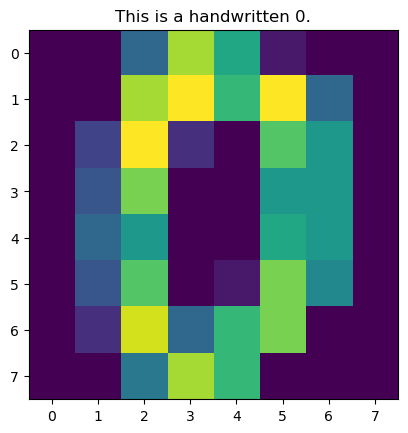

In [6]:
#example image
plt.imshow(digits[0].reshape(8, 8))
plt.title('This is a handwritten 0.');

In [7]:
# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Define models and their hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontree': (DecisionTreeClassifier(), {'decisiontree__max_depth': [5, 10, 15]})
}

In [11]:
results = []

# Train and evaluate each model
for name, (model, params) in models.items():
    # Create a pipeline with StandardScaler and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name, model)
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    
    # Append the results
    results.append([name, train_score, test_score, fit_time])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['model', 'train score', 'test score', 'average fit time'])
results_df.set_index('model', inplace=True)

# Display the DataFrame
results_df

,train score,test score,average fit time
model,,,
knn,0.988170,0.969444,0.017453
logisticregression,0.998608,0.972222,0.047513
svc,1.000000,0.980556,0.059948
decisiontree,1.000000,0.858333,0.024459


For handwritten digit recognition, I would choose SVM (SVC) as the primary model.

- SVM performs best on this task, achieving the highest test accuracy. Digit datasets are usually well balanced, so class imbalance is less of a concern. While SVMs are less interpretable, interpretability is not critical here compared to prediction accuracy.

- Logistic Regression trains quickly and performs well, but it is limited to mostly linear decision boundaries and may miss complex pixel patterns.

- KNN also performs well, but it scales poorly with larger datasets and is slower at prediction time since it relies on distance calculations.

- Decision Trees train quickly but tend to overfit, which is reflected in perfect training accuracy but much lower test performance.

Overall, since accuracy is the top priority and interpretability is less important for digit recognition, SVM offers the best trade-off between performance and training speed for this task.